# Do you want to know why you lose hair?

## 📖 Background
As we age, hair loss becomes one of the health concerns of many people. The fullness of hair not only affects appearance, but is also closely related to an individual's health.

A survey brings together a variety of factors that may contribute to hair loss, including genetic factors, hormonal changes, medical conditions, medications, nutritional deficiencies, psychological stress, and more. Through data exploration and analysis, the potential correlation between these factors and hair loss can be deeply explored, thereby providing useful reference for the development of individual health management, medical intervention and related industries.

## 💾 The data

The survey provides the information you need in the `Predict Hair Fall.csv` in the `data` folder.

#### Data contains information on persons in this survey. Each row represents one person.
- "Id" - A unique identifier for each person.
- "Genetics" - Whether the person has a family history of baldness.
- "Hormonal Changes" - Indicates whether the individual has experienced hormonal changes (Yes/No).
- "Medical Conditions" - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- "Medications & Treatments" - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- "Nutritional Deficiencies" - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- "Stress" - Indicates the stress level of the individual (Low/Moderate/High).
- "Age" - Represents the age of the individual.
- "Poor Hair Care Habits" - Indicates whether the individual practices poor hair care habits (Yes/No).
- "Environmental Factors" - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- "Smoking" - Indicates whether the individual smokes (Yes/No).
- "Weight Loss" - Indicates whether the individual has experienced significant weight loss (Yes/No).
- "Hair Loss" - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

# Notebook Contents

## Data Analysis
### Data Cleaning & Preprocessing
* Importing Necessary Libraries
* Learning Data
* Preprocessing

### Exploratory Data Analysis
* Grouped Frequency Distribution
* Age Analysis

### Executive Summary
* Key Findings
* Additional Insights


In [37]:
import pandas as pd
data = pd.read_csv('data/Predict Hair Fall.csv')
data.head(10)

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
5,139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1
6,169255,Yes,Yes,No Data,No Data,Selenium deficiency,High,40,Yes,No,No,No,1
7,112032,Yes,No,Dermatosis,Chemotherapy,Omega-3 fatty acids,High,35,Yes,No,Yes,No,0
8,140785,Yes,No,Eczema,Steroids,Selenium deficiency,Moderate,19,No,No,Yes,Yes,1
9,187999,No,Yes,Ringworm,Rogaine,Magnesium deficiency,Moderate,49,Yes,Yes,Yes,No,0


In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning and **Preprocessing**

### Learning Data

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [40]:
data.shape

(999, 13)

In [41]:
df = data.drop_duplicates(subset='Id')

In [42]:
df.shape

(995, 13)

In [43]:
data['Id'].value_counts().head(5)

Id
110171    2
157627    2
172639    2
186979    2
119293    1
Name: count, dtype: int64

### Preprocessing

In [44]:
data[data['Id']==110171]

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
388,110171,Yes,No,Thyroid Problems,Antifungal Cream,Selenium deficiency,Low,25,Yes,No,Yes,Yes,0
408,110171,No,No,Psoriasis,Immunomodulators,Vitamin E deficiency,Low,41,Yes,No,No,Yes,0


In [45]:
data[data['Id']==157627]

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
237,157627,Yes,No,Dermatosis,Rogaine,Protein deficiency,Moderate,47,Yes,No,Yes,Yes,1
600,157627,No,No,Thyroid Problems,Accutane,Protein deficiency,Moderate,44,Yes,Yes,Yes,Yes,0


In [46]:
data[data['Id']==172639]

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
118,172639,Yes,Yes,Androgenetic Alopecia,Heart Medication,Iron deficiency,Moderate,29,Yes,No,Yes,No,1
866,172639,Yes,Yes,No Data,Accutane,Vitamin A Deficiency,Low,47,Yes,No,No,Yes,0


In [47]:
data[data['Id']==186979]

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
669,186979,No,No,Seborrheic Dermatitis,Blood Pressure Medication,Vitamin E deficiency,Moderate,41,No,No,No,No,1
956,186979,Yes,Yes,Seborrheic Dermatitis,Chemotherapy,No Data,Moderate,21,No,No,Yes,No,1


In [48]:
data.loc[408, 'Id'] = 200001
data.loc[600, 'Id'] = 200002
data.loc[866, 'Id'] = 200003
data.loc[956, 'Id'] = 200004

In [49]:
df = data.drop_duplicates()

In [50]:
df.shape

(999, 13)

 ### There were 4 same unique id on the data, but they represented the different person, so I change their ids to prevent **misinformation**

In [51]:
df.drop('Id', axis=1, inplace=True)

In [52]:
df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [53]:
df_hairloss_yes = df[df['Hair Loss'] == 1]
df_hairloss_no = df[df['Hair Loss'] == 0]

In [54]:
filtered_rows = df[df.eq('No Data').any(axis=1)]
filtered_rows

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
6,Yes,Yes,No Data,No Data,Selenium deficiency,High,40,Yes,No,No,No,1
21,No,No,No Data,Chemotherapy,Zinc Deficiency,High,20,No,Yes,Yes,Yes,1
29,No,Yes,Dermatitis,Chemotherapy,No Data,Low,21,Yes,Yes,Yes,No,0
30,No,No,Dermatosis,Chemotherapy,No Data,High,22,Yes,Yes,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
976,Yes,Yes,Psoriasis,Blood Pressure Medication,No Data,Low,21,Yes,Yes,Yes,No,0
981,Yes,Yes,No Data,Antibiotics,Iron deficiency,High,40,Yes,Yes,Yes,Yes,0
988,No,No,Androgenetic Alopecia,Antibiotics,No Data,High,23,Yes,Yes,No,Yes,0
993,No,Yes,Scalp Infection,Immunomodulators,No Data,Moderate,23,Yes,Yes,Yes,Yes,0


 ## Exploratory Data Analysis

In [55]:
def checkColUnique(df):
    for col in df.columns:
        print(str(col))
        print(df[col].unique())
        print(len(df[col].unique()))
        print('*************')
        
checkColUnique(df)

Genetics
['Yes' 'No']
2
*************
Hormonal Changes
['No' 'Yes']
2
*************
Medical Conditions
['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']
11
*************
Medications & Treatments
['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']
11
*************
Nutritional Deficiencies 
['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' 'No Data'
 'Vitamin E deficiency']
11
*************
Stress
['Moderate' 'High' 'Low']
3
*************
Age
[19 43 26 46 30 37 40 35 49 48 20 34 29 33 28 41 21 22 45 24 31 39 38 36
 18 44 50 27 25 23 47 32 42]
33
*************
Poor Hair Care Habits 
['Yes' 'No']
2


### Grouped Frequency Distribution

In [56]:
for col in df.columns:
    if col == 'Hair Loss':
        pass
    else:
        print(str(col))
        print(df.groupby(col)['Hair Loss'].value_counts())
        print("           ")      

Genetics
Genetics  Hair Loss
No        0            250
          1            227
Yes       1            270
          0            252
Name: count, dtype: int64
           
Hormonal Changes
Hormonal Changes  Hair Loss
No                0            248
                  1            242
Yes               1            255
                  0            254
Name: count, dtype: int64
           
Medical Conditions
Medical Conditions     Hair Loss
Alopecia Areata        1            61
                       0            46
Androgenetic Alopecia  1            55
                       0            43
Dermatitis             0            48
                       1            44
Dermatosis             0            45
                       1            43
Eczema                 0            36
                       1            33
No Data                0            63
                       1            47
Psoriasis              0            50
                       1            50
Ring

In [57]:
for col in df.columns:
    if col == 'Hair Loss' or col == 'Genetics' or col == 'Age':
        pass
    else:
        print(str(col))
        #print(df.groupby(['Genetics',col])['Hair Loss'].value_counts()) #normalize=True
        df_x = df.groupby(['Genetics',col])['Hair Loss'].value_counts(normalize=True)
        print(df_x[(df_x.index.get_level_values('Hair Loss') == 1) & (df_x > 0.58)].reset_index())
        print("           ")      

Hormonal Changes
Empty DataFrame
Columns: [Genetics, Hormonal Changes, Hair Loss, proportion]
Index: []
           
Medical Conditions
  Genetics     Medical Conditions  Hair Loss  proportion
0       No  Seborrheic Dermatitis          1    0.583333
1      Yes       Alopecia Areata           1    0.603774
2      Yes  Androgenetic Alopecia          1    0.645833
           
Medications & Treatments
  Genetics Medications & Treatments  Hair Loss  proportion
0       No                 Steroids          1    0.595238
           
Nutritional Deficiencies 
  Genetics Nutritional Deficiencies   Hair Loss  proportion
0      Yes      Magnesium deficiency          1    0.615385
1      Yes       Selenium deficiency          1    0.581395
           
Stress
Empty DataFrame
Columns: [Genetics, Stress, Hair Loss, proportion]
Index: []
           
Poor Hair Care Habits 
Empty DataFrame
Columns: [Genetics, Poor Hair Care Habits , Hair Loss, proportion]
Index: []
           
Environmental Factors
Empty 

In [58]:
for col in df.columns:
    if col == 'Hair Loss' or col == 'Hormonal Changes' or col == 'Age':
        pass
    else:
        print(str(col))
        df_x = df.groupby(['Hormonal Changes',col])['Hair Loss'].value_counts(normalize=True)
        print(df_x[(df_x.index.get_level_values('Hair Loss') == 1) & (df_x > 0.58)].reset_index())
        print("           ")      

Genetics
Empty DataFrame
Columns: [Hormonal Changes, Genetics, Hair Loss, proportion]
Index: []
           
Medical Conditions
  Hormonal Changes     Medical Conditions  Hair Loss  proportion
0               No       Alopecia Areata           1    0.640000
1              Yes  Androgenetic Alopecia          1    0.641509
2              Yes  Seborrheic Dermatitis          1    0.636364
           
Medications & Treatments
  Hormonal Changes Medications & Treatments  Hair Loss  proportion
0               No             Chemotherapy          1    0.615385
1              Yes              Antibiotics          1    0.584906
2              Yes                  No Data          1    1.000000
3              Yes                  Rogaine          1    0.612903
           
Nutritional Deficiencies 
  Hormonal Changes Nutritional Deficiencies   Hair Loss  proportion
0              Yes           Iron deficiency          1    0.604651
1              Yes        Protein deficiency          1    0.612245

In [59]:
for col in df.columns:
    if col == 'Hair Loss' or col == 'Stress' or col == 'Age':
        pass
    else:
        print(str(col))
        df_x = df.groupby(['Stress',col])['Hair Loss'].value_counts(normalize=True)
        print(df_x[(df_x.index.get_level_values('Hair Loss') == 1) & (df_x > 0.58)].reset_index())
        print("           ")   

Genetics
Empty DataFrame
Columns: [Stress, Genetics, Hair Loss, proportion]
Index: []
           
Hormonal Changes
Empty DataFrame
Columns: [Stress, Hormonal Changes, Hair Loss, proportion]
Index: []
           
Medical Conditions
     Stress     Medical Conditions  Hair Loss  proportion
0      High        Scalp Infection          1    0.666667
1       Low       Alopecia Areata           1    0.600000
2       Low             Dermatosis          1    0.580645
3  Moderate  Androgenetic Alopecia          1    0.666667
4  Moderate                 Eczema          1    0.608696
5  Moderate  Seborrheic Dermatitis          1    0.718750
           
Medications & Treatments
     Stress Medications & Treatments  Hair Loss  proportion
0      High             Chemotherapy          1    0.621622
1      High        Heart Medication           1    0.594595
2      High                  No Data          1    1.000000
3      High                 Steroids          1    0.606061
4       Low               

In [60]:
for col in df.columns:
    if col == 'Hair Loss' or col == 'Poor Hair Care Habits ' or col == 'Age':
        pass
    else:
        print(str(col))
        df_x = df.groupby(['Poor Hair Care Habits ',col])['Hair Loss'].value_counts(normalize=True)
        print(df_x[(df_x.index.get_level_values('Hair Loss') == 1) & (df_x > 0.58)].reset_index())
        print("           ")   

Genetics
Empty DataFrame
Columns: [Poor Hair Care Habits , Genetics, Hair Loss, proportion]
Index: []
           
Hormonal Changes
Empty DataFrame
Columns: [Poor Hair Care Habits , Hormonal Changes, Hair Loss, proportion]
Index: []
           
Medical Conditions
  Poor Hair Care Habits      Medical Conditions  Hair Loss  proportion
0                     No  Androgenetic Alopecia          1    0.622222
1                    Yes       Alopecia Areata           1    0.660377
           
Medications & Treatments
  Poor Hair Care Habits  Medications & Treatments  Hair Loss  proportion
0                     No              Antibiotics          1    0.595745
1                     No                 Steroids          1    0.588235
           
Nutritional Deficiencies 
  Poor Hair Care Habits  Nutritional Deficiencies   Hair Loss  proportion
0                     No      Magnesium deficiency          1    0.590909
1                     No       Selenium deficiency          1    0.586957
        

In [61]:
df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [62]:
for col in df.columns:
    if col == 'Hair Loss' or col == 'Environmental Factors' or col == 'Age':
        pass
    else:
        print(str(col))
        df_x = df.groupby(['Environmental Factors',col])['Hair Loss'].value_counts(normalize=True)
        print(df_x[(df_x.index.get_level_values('Hair Loss') == 1) & (df_x > 0.58)].reset_index())
        print("           ")   

Genetics
Empty DataFrame
Columns: [Environmental Factors, Genetics, Hair Loss, proportion]
Index: []
           
Hormonal Changes
Empty DataFrame
Columns: [Environmental Factors, Hormonal Changes, Hair Loss, proportion]
Index: []
           
Medical Conditions
  Environmental Factors     Medical Conditions  Hair Loss  proportion
0                    No       Alopecia Areata           1    0.586207
1                   Yes  Androgenetic Alopecia          1    0.585366
2                   Yes  Seborrheic Dermatitis          1    0.630435
           
Medications & Treatments
  Environmental Factors Medications & Treatments  Hair Loss  proportion
0                    No        Heart Medication           1    0.591837
1                    No                  No Data          1    1.000000
           
Nutritional Deficiencies 
  Environmental Factors Nutritional Deficiencies   Hair Loss  proportion
0                    No      Magnesium deficiency          1    0.605263
1                    N

In [63]:
for col in df.columns:
    if col == 'Hair Loss' or col == 'Smoking' or col == 'Age':
        pass
    else:
        print(str(col))
        df_x = df.groupby(['Smoking',col])['Hair Loss'].value_counts(normalize=True)
        print(df_x[(df_x.index.get_level_values('Hair Loss') == 1) & (df_x > 0.58)].reset_index())
        print("           ")   

Genetics
Empty DataFrame
Columns: [Smoking, Genetics, Hair Loss, proportion]
Index: []
           
Hormonal Changes
Empty DataFrame
Columns: [Smoking, Hormonal Changes, Hair Loss, proportion]
Index: []
           
Medical Conditions
  Smoking     Medical Conditions  Hair Loss  proportion
0      No       Alopecia Areata           1    0.660714
1      No  Seborrheic Dermatitis          1    0.619048
           
Medications & Treatments
  Smoking Medications & Treatments  Hair Loss  proportion
0      No                  Rogaine          1    0.600000
1      No                 Steroids          1    0.583333
           
Nutritional Deficiencies 
  Smoking Nutritional Deficiencies   Hair Loss  proportion
0      No           Iron deficiency          1    0.702703
1      No      Magnesium deficiency          1    0.581395
2     Yes        Protein deficiency          1    0.622222
           
Stress
Empty DataFrame
Columns: [Smoking, Stress, Hair Loss, proportion]
Index: []
           
Poor Ha

In [64]:
for col in df.columns:
    if col == 'Hair Loss' or col == 'Weight Loss ' or col == 'Age':
        pass
    else:
        print(str(col))
        df_x = df.groupby(['Weight Loss ',col])['Hair Loss'].value_counts(normalize=True)
        print(df_x[(df_x.index.get_level_values('Hair Loss') == 1) & (df_x > 0.58)].reset_index())
        print("           ")   

Genetics
Empty DataFrame
Columns: [Weight Loss , Genetics, Hair Loss, proportion]
Index: []
           
Hormonal Changes
Empty DataFrame
Columns: [Weight Loss , Hormonal Changes, Hair Loss, proportion]
Index: []
           
Medical Conditions
  Weight Loss  Medical Conditions  Hair Loss  proportion
0           No   Alopecia Areata           1         0.6
           
Medications & Treatments
  Weight Loss  Medications & Treatments  Hair Loss  proportion
0           No              Antibiotics          1    0.586957
1          Yes             Chemotherapy          1    0.674419
2          Yes        Heart Medication           1    0.588235
3          Yes                 Steroids          1    0.591837
           
Nutritional Deficiencies 
  Weight Loss  Nutritional Deficiencies   Hair Loss  proportion
0          Yes      Magnesium deficiency          1    0.604651
1          Yes                   No Data          1    0.588235
2          Yes       Selenium deficiency          1    0.6052

### Age analysis

In [65]:
df['Age'].describe()

count    999.000000
mean      34.188188
std        9.377980
min       18.000000
25%       26.000000
50%       34.000000
75%       42.000000
max       50.000000
Name: Age, dtype: float64

In [66]:
df_hairloss_yes['Age'].describe()

count    497.000000
mean      33.599598
std        9.128266
min       18.000000
25%       26.000000
50%       33.000000
75%       41.000000
max       50.000000
Name: Age, dtype: float64

In [67]:
df_hairloss_no['Age'].describe()

count    502.000000
mean      34.770916
std        9.592356
min       18.000000
25%       26.000000
50%       35.000000
75%       43.000000
max       50.000000
Name: Age, dtype: float64

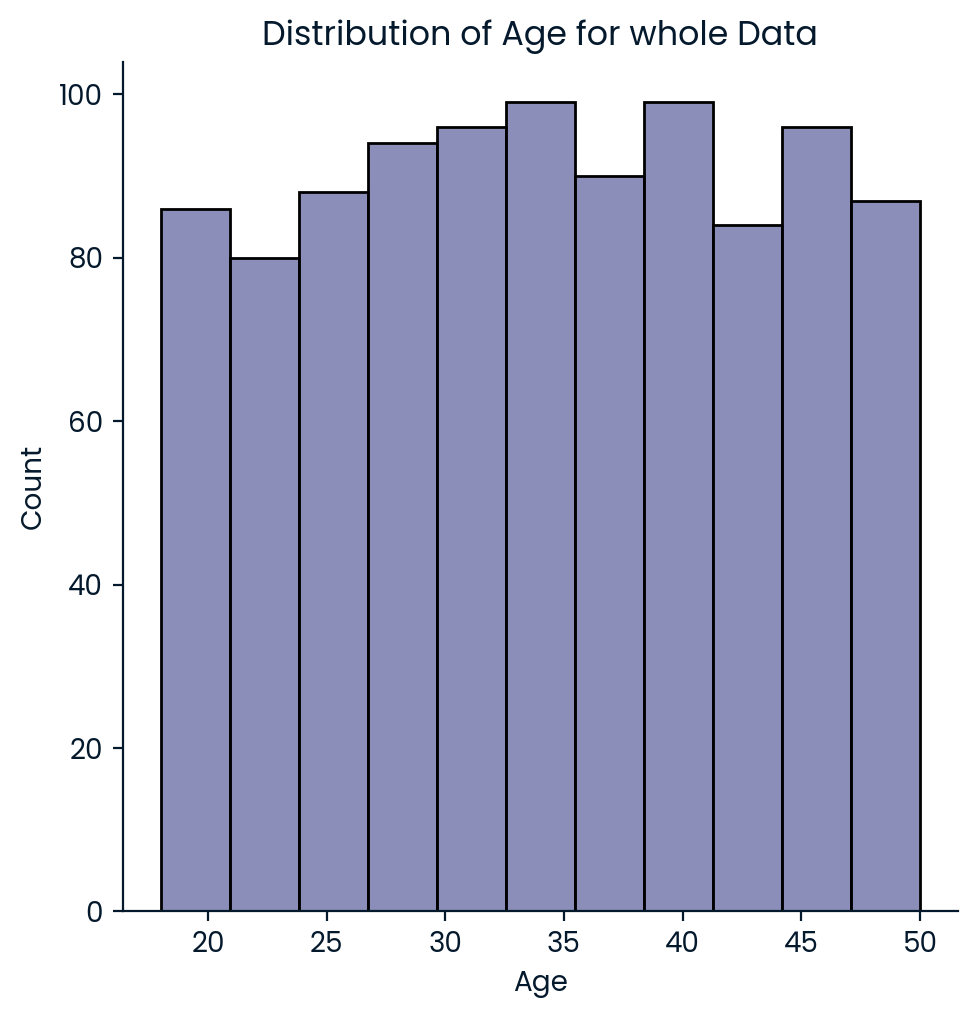

In [68]:
sns.displot(x='Age', data = df)
plt.title("Distribution of Age for whole Data")
plt.show()

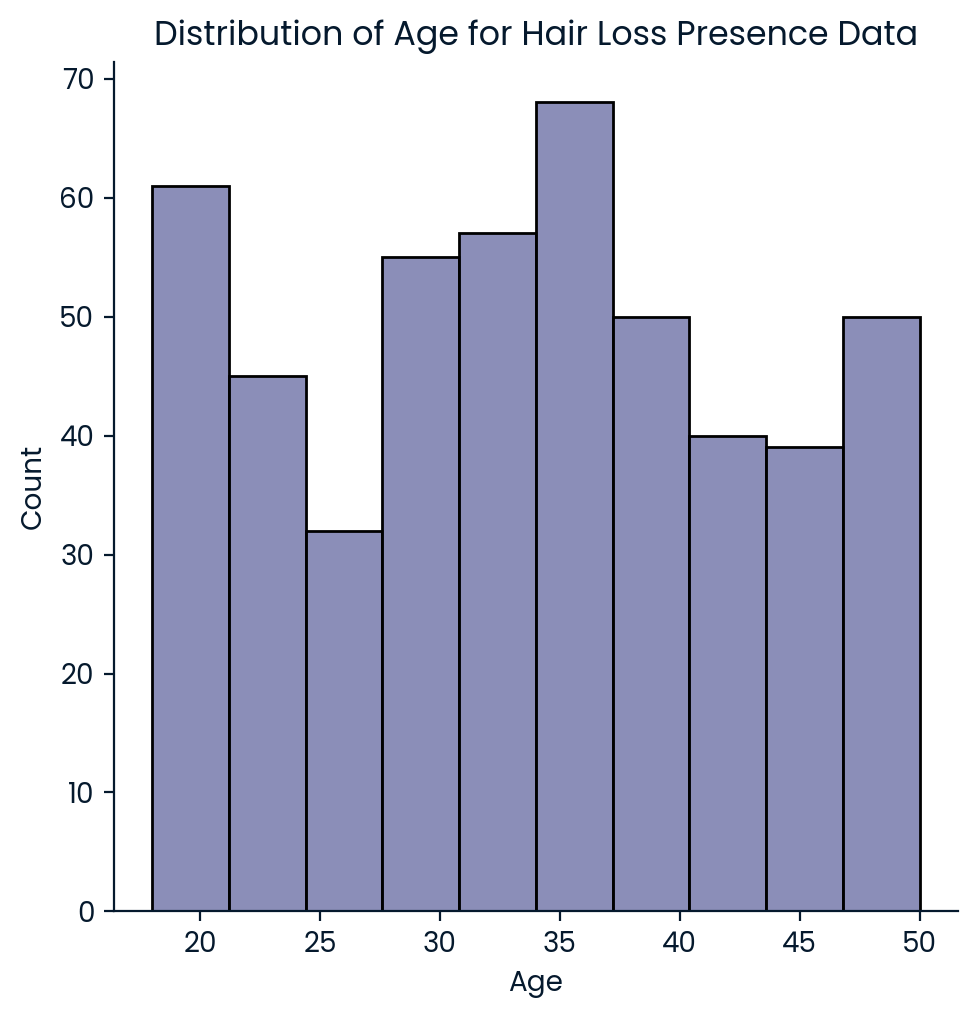

In [69]:
sns.displot(x='Age', data = df_hairloss_yes)
plt.title("Distribution of Age for Hair Loss Presence Data")
plt.show()

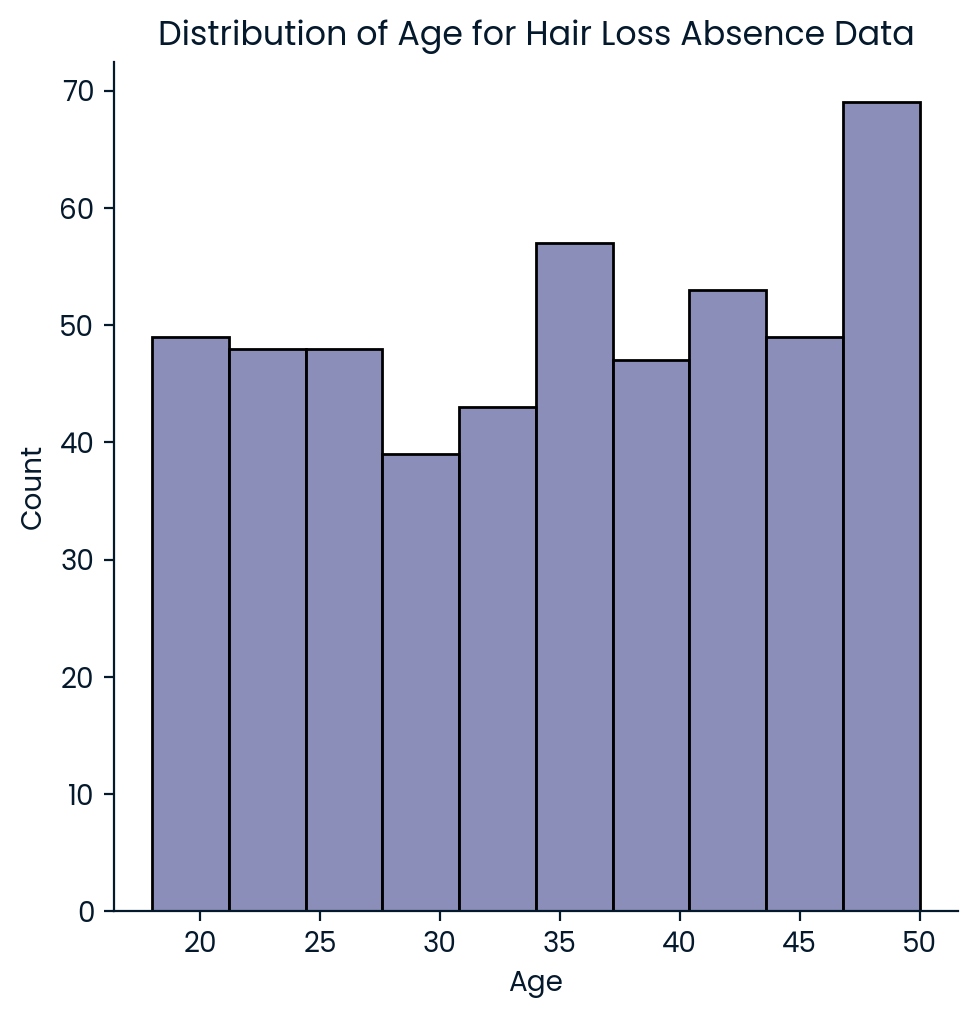

In [70]:
sns.displot(x='Age', data = df_hairloss_no)
plt.title("Distribution of Age for Hair Loss Absence Data")
plt.show()

Genetics


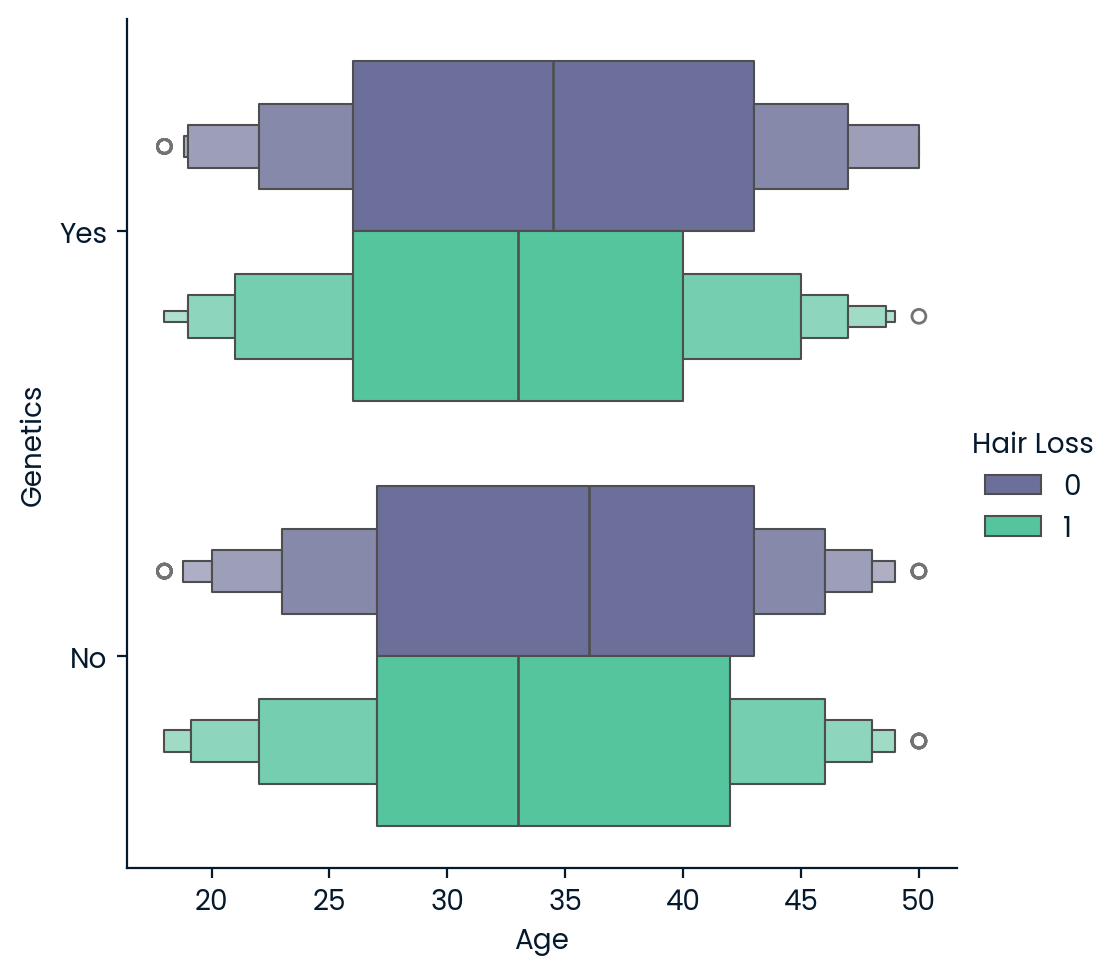

Hormonal Changes


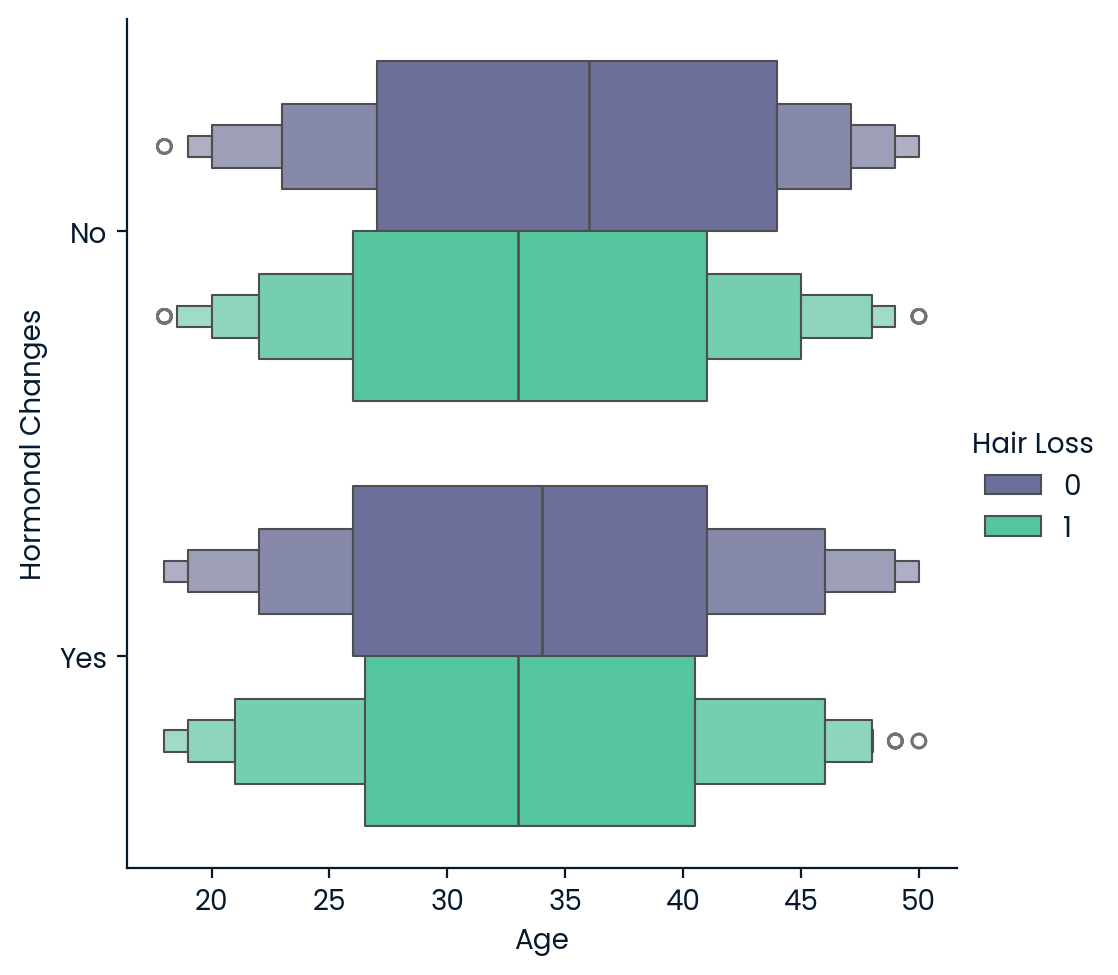

Medical Conditions


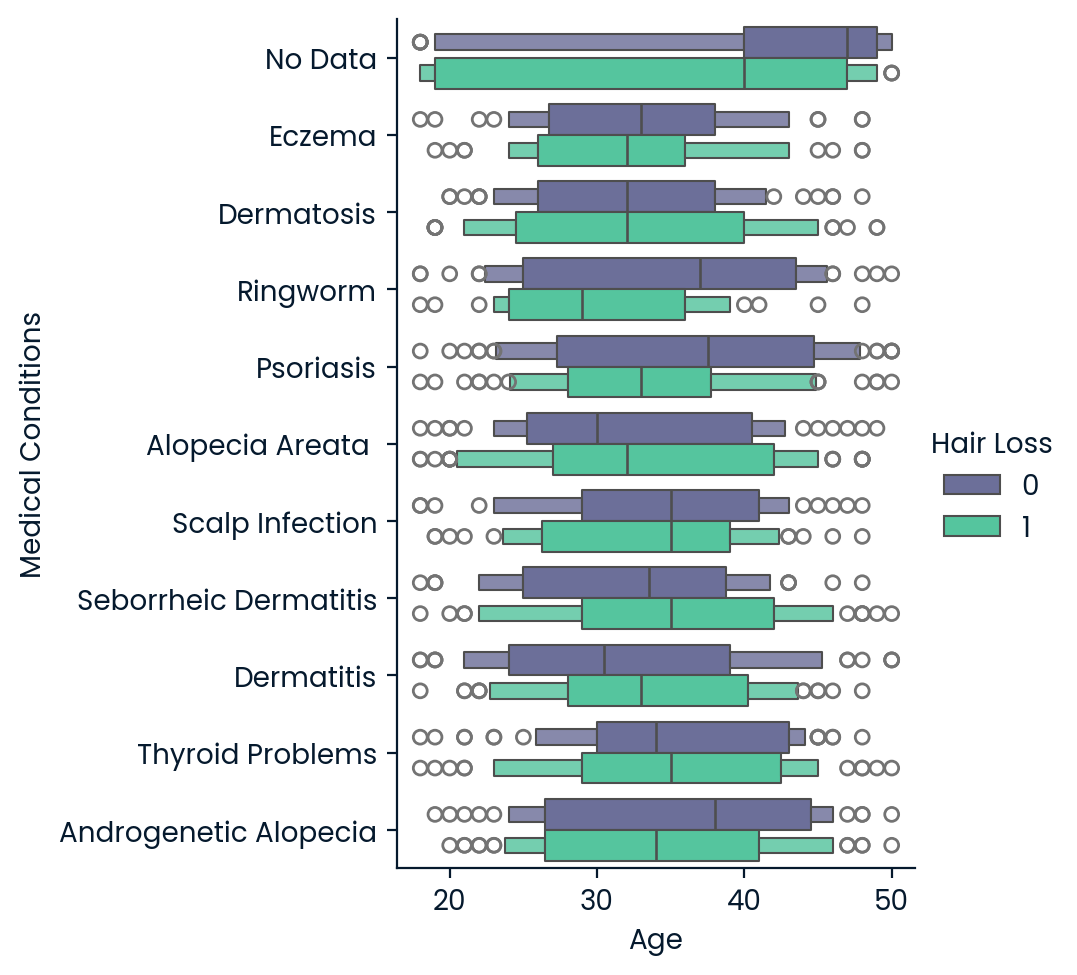

Medications & Treatments


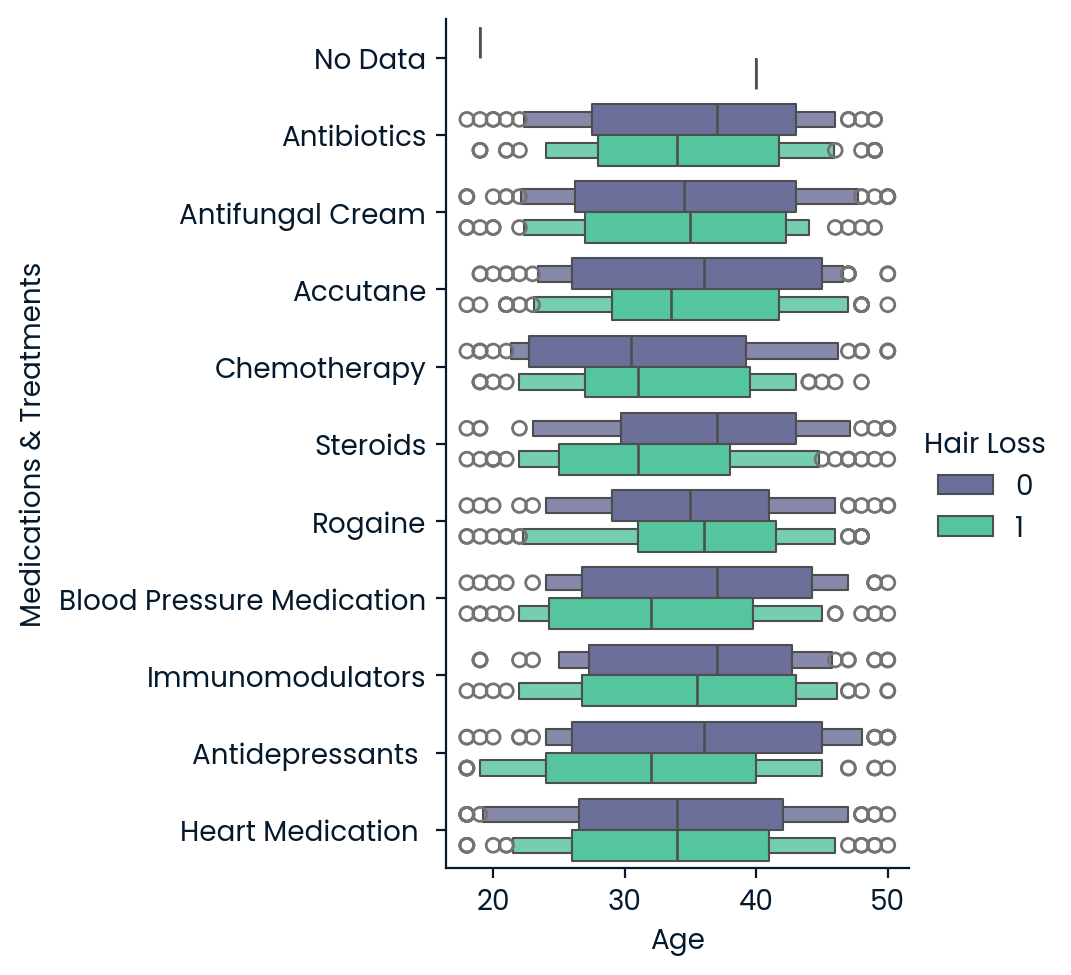

Nutritional Deficiencies 


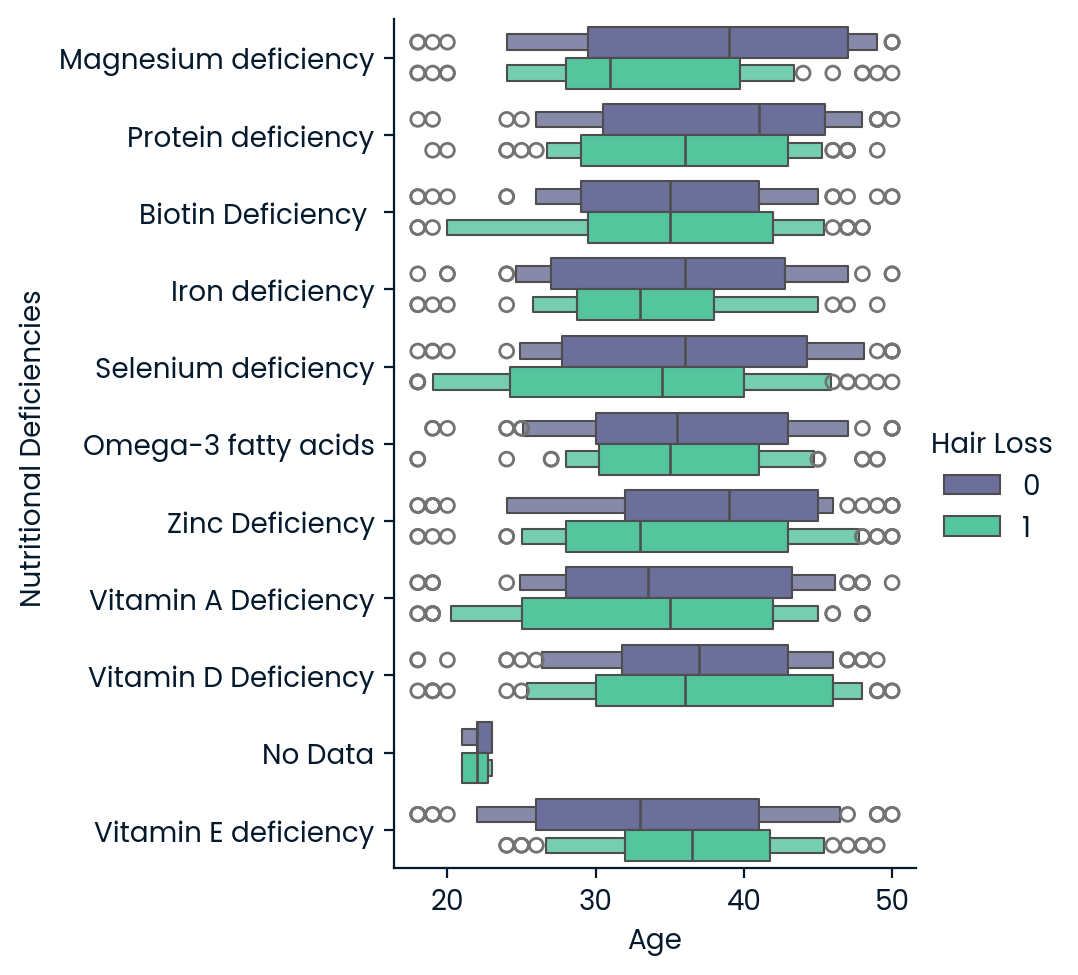

Stress


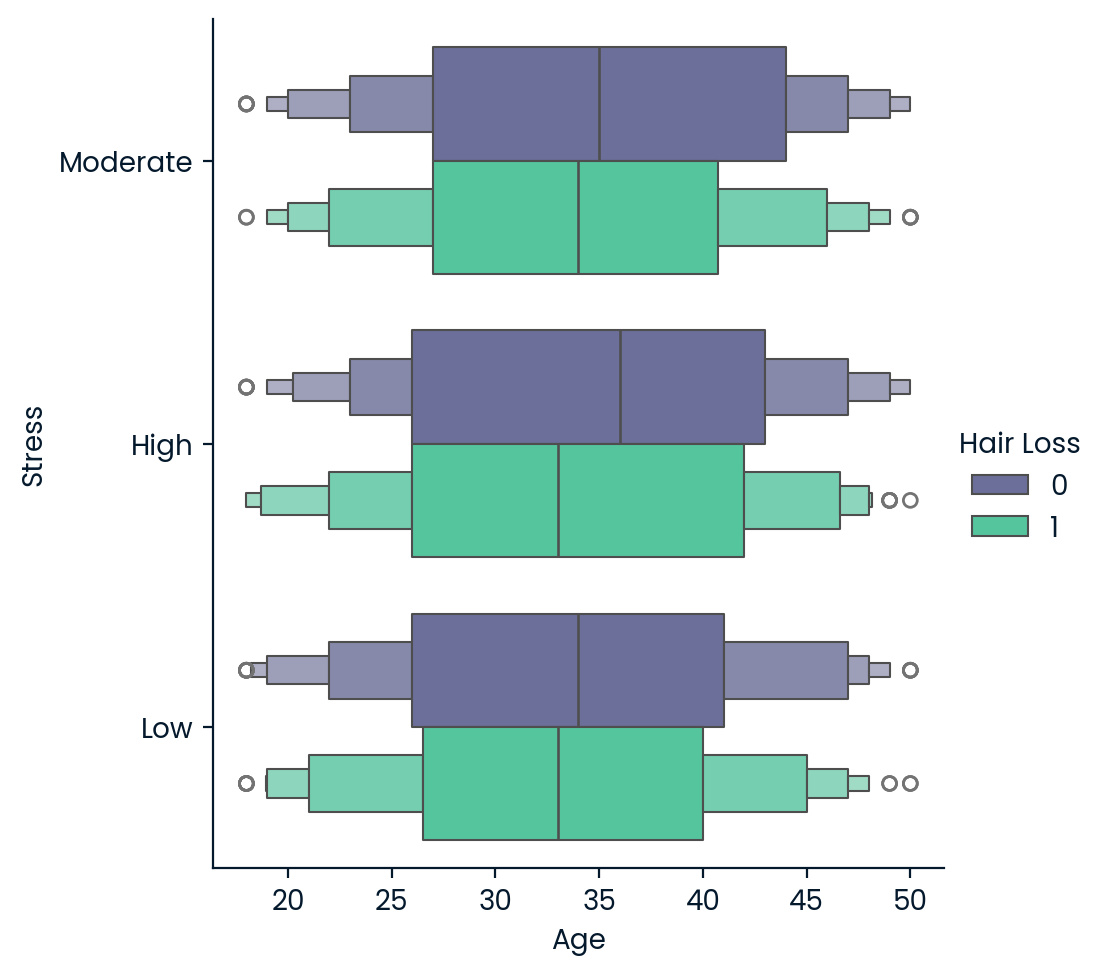

Poor Hair Care Habits 


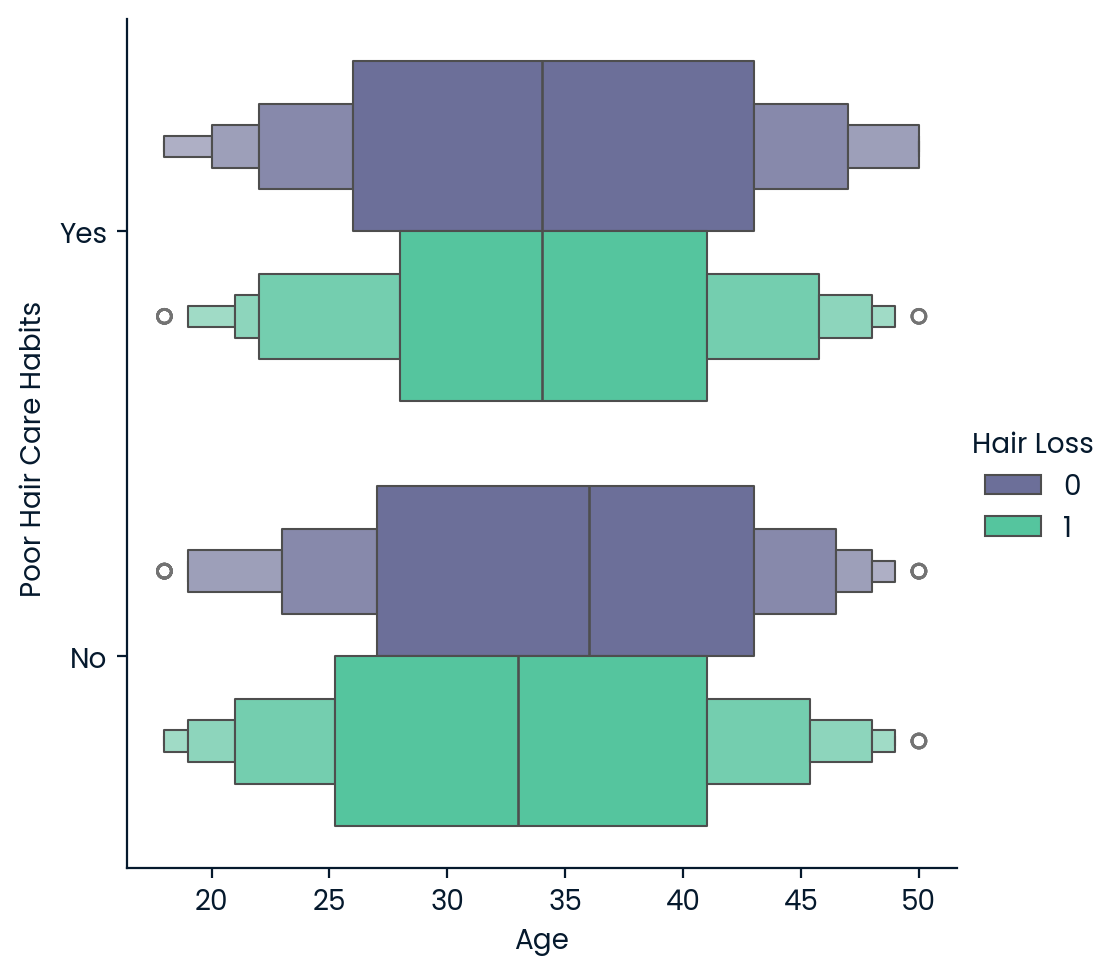

Environmental Factors


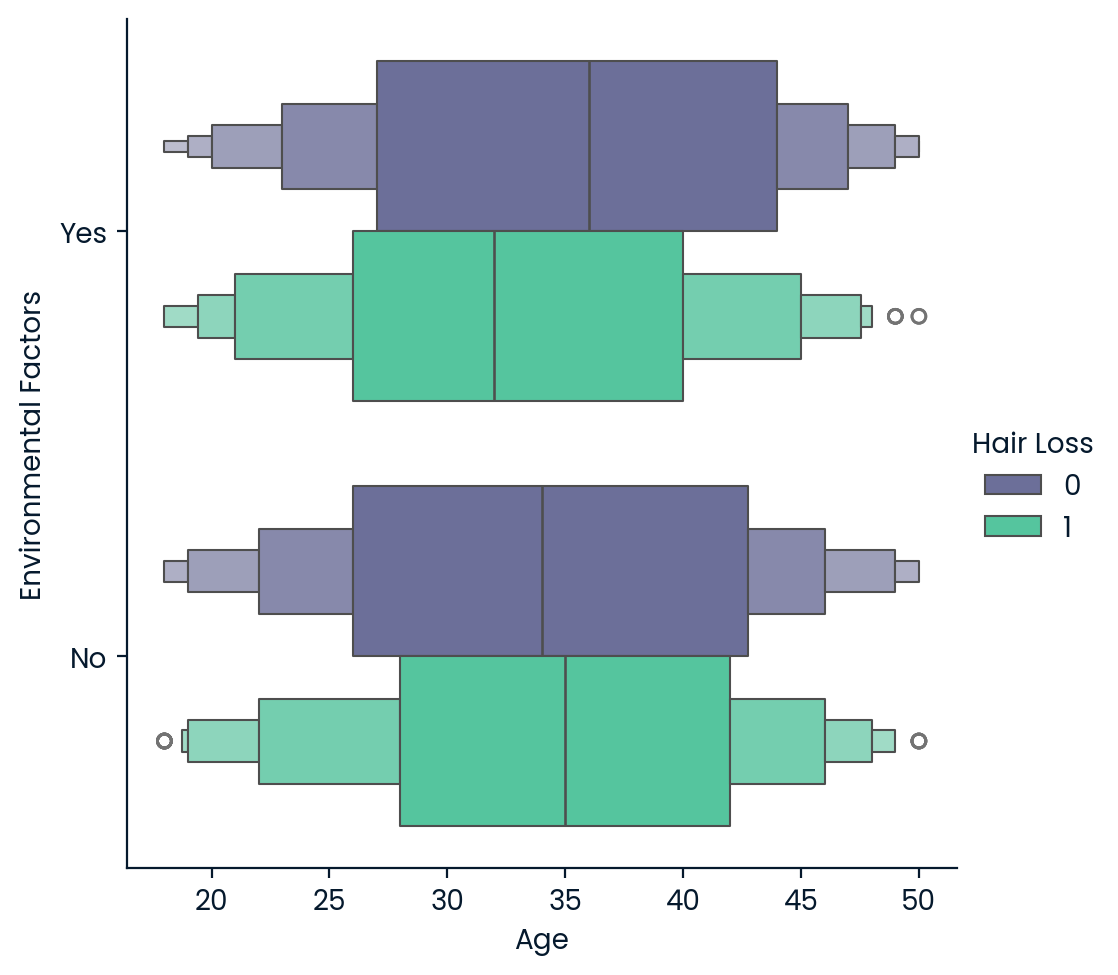

Smoking


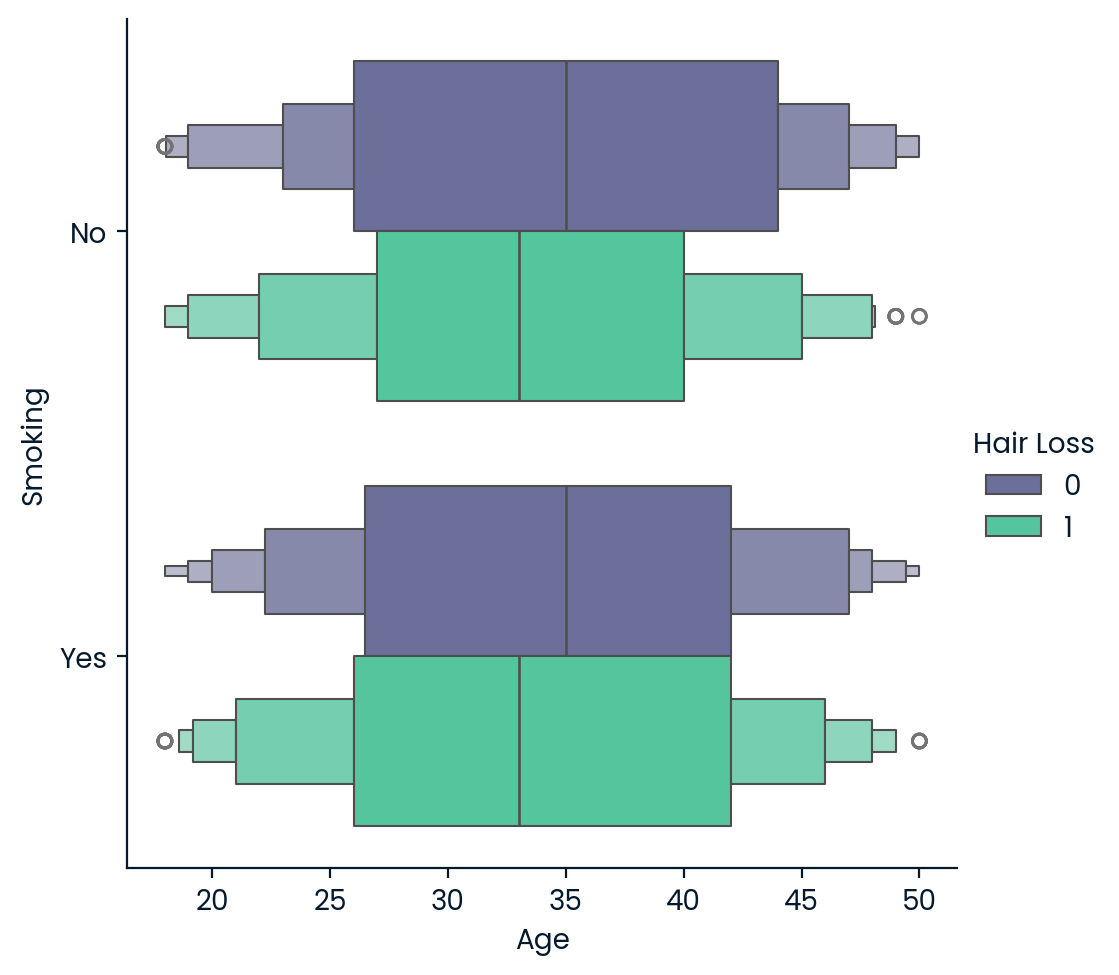

In [71]:
for col in df.columns:
    if col == 'Hair Loss' or col == 'Weight Loss ' or col == 'Age':
        pass
    else:
        print(col)
        #sns.boxplot(data=df, x="Age", y=col, hue="Hair Loss", native_scale=True)
        sns.catplot(data=df, x="Age", y=col, hue="Hair Loss", kind="boxen")

        plt.show()


# Project Summary

## Descriptive Statistics

### Age Analysis
- The average age of the dataset is approximately 34-35 years old
- Min age is 18 and max age is 50 in the data
- Age distribution seems like roughly uniform distribution in the data
- When we consider the hair loss (presence), the age distribution seem like multimodal distribution because it has lots of peaks
- When we consider the hair loss (absence), the age distribution seem like right-skewed distribution
- Overall, the age analyse doesn't show any detailed clues about hair loss
- Hair loss could be happened any kind of age range 

### Genetics Analysis 
- Hair loss could be happened or not happened within your family genetics
- Some medical conditions like _alopecia_ could affect more if family genetic is yes
- Some nutritional defenciencies like _magnesium and selenium_ could affect more if family genetic is yes
- Even though family genetics is No, still there would be hair loss due to some medical conditions like Seborrheic Dermatitis

### Hormonal Changes
- Hair loss could be happened or not happened within hormonal changes
- Some medical conditions like _alopecia, dermatitis_ could affect more if hormonal change is yes
- Some nutritional defenciencies like _iron and protein_ could affect more if family genetic is yes
- Some medications like _antibiotics, rogaine_ could affect hair loss
- Even though hormonal changes is No, still there would be hair loss due to some medical conditions like Alopecia Areata

### Stress Level
- Hair loss could be happened every kind of stress level
- High stress level does not mean that the hair loss will be certain

### Poor Hair Care Habits, Environmental Factors, Smoking
- In these parameters, having or not having does not mean that the hair loss will be certain
- If you have some medical conditions or deficiencies of some nutritions you will lose your hair

### Other Insights
- The most important nutritional defenciencies seems to be Magnesium, Selenium and Protein
- Using Sterodis can be lead to lose hair
- Taking Chemotherapy can be cause lose hair